#  Build a machine learning model to predict salary  based on position for a given dataset

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/admin1/machine_learning/week9/Position_Salaries.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
data.drop(['Position'], 
          axis = 1, 
          inplace = True)

In [5]:
data

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [6]:
x = data.iloc[:, 0:-1].values
y = data.iloc[:, -1:].values

In [7]:
reg = DecisionTreeRegressor(criterion = 'mse', 
                            max_depth = 4 
                            )

reg.fit(x,y)
pickle_out = open("Decision_Tree.pickle","wb")
pickle.dump(reg, pickle_out)
pickle_out.close()


In [8]:
pickle_in = open("Decision_Tree.pickle","rb")
model = pickle.load(pickle_in)
y_pred = model.predict(x)

In [9]:
y_pred

array([  51666.66666667,   51666.66666667,   51666.66666667,
         80000.        ,  110000.        ,  150000.        ,
        200000.        ,  300000.        ,  500000.        ,
       1000000.        ])

In [10]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [11]:
mse = metrics.mean_squared_error(y, y_pred)
print('MSE-',mse)
rmse = np.sqrt(mse)
print('RMSE-',rmse)

MSE- 11666666.666666666
RMSE- 3415.650255319866


# Visualization of the decision graph

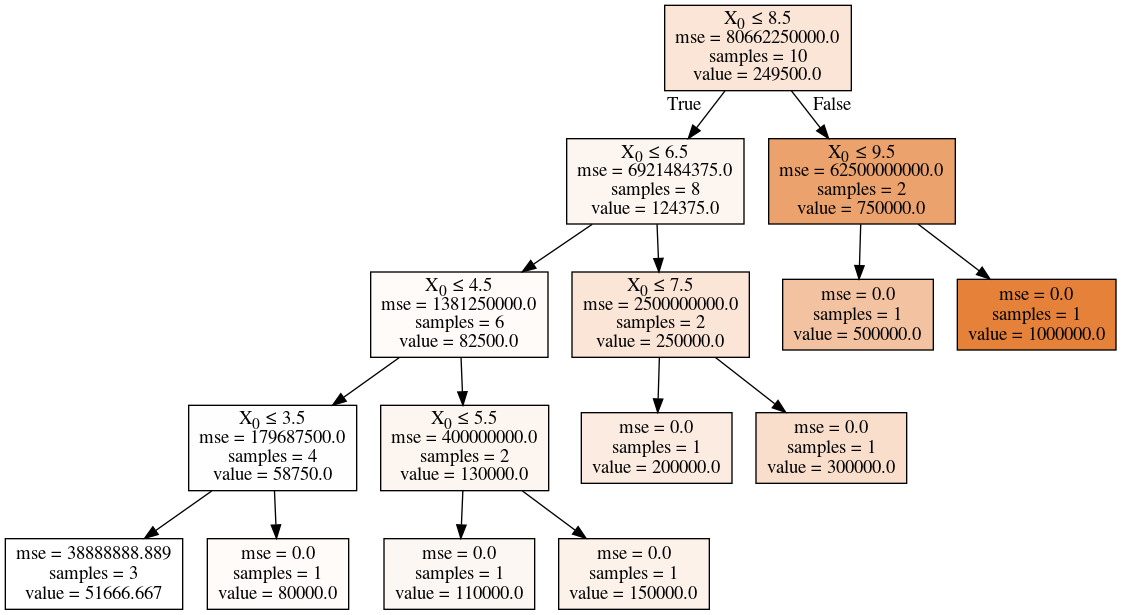

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


#Create Dot data(returns tree in string format)
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True,  
                special_characters=True)
#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#Show graph
Image(graph.create_png())